# Distribution of influences

To get a grip on how much randomness influences the results, we run the same model lots of times and compare the results.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

Then load all modules and set parameters for simulations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [2]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=20_000 # size of the population to be simulated
size1=6_000_000 #0_000 # number of timesteps in phase 1 training (callback not used)
size2=100 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=100 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1_00 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli='best/malli_baseline'
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli_start='best/v2_malli_base_dev'
perusmalli='best/v2_malli_base_dev'
perusresults='results/baseline/distrib_stats'
prefmalli='best/v2_malli_perus_prefnoise'
prefresults='results/v2_perus_results_prefnoise'
debug=False # jos True, niin ajetaan vain yhdellä prosessilla. Nopeampi debugata.
plotdebug=False # tulostetaanko rivi riviltä mitä tapahtuu

# Baseline

Lasketaan työllisyysasteet nykymallissa.

In [4]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc1.explain()
cc1.run_distrib(n=10,startn=0,debug=debug,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=perusmalli,plot=True,cont=True,start_from=perusmalli,results=perusresults,
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

Parameters of lifecycle:
timestep 0.25
gamma 0.92 per anno
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 None
ansiopvraha_kesto400 None
ansiopvraha_toe None
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki None
include_pinkslip True

computing 98
train...
phase 1


KeyboardInterrupt: 

plotdebug False
No mortality included
False
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

lisäpäivillä on 6722 henkilöä
Työllisyyden keskiarvo keskiarvo 2095342 htv, mediaani 2095864 htv std 6377 htv
keskiarvo 2265876 työllistä, mediaani 2265543 työllistä, std 6370 työllistä


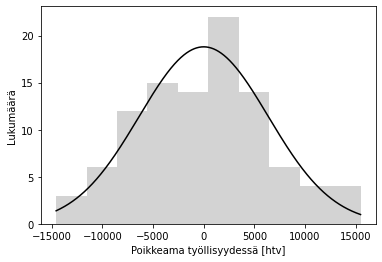

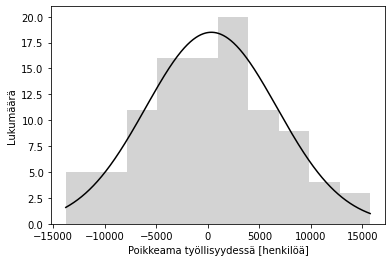

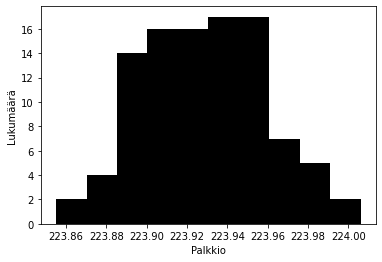

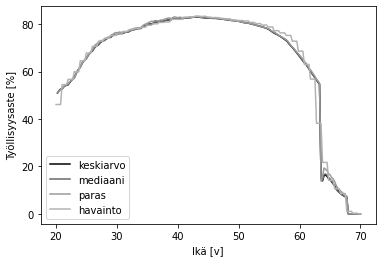

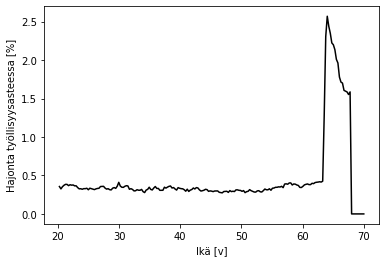

Keskikestot käytettyjen ansiosidonnaisten päivärahojen mukaan
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.00 |      0.00 |       0.00 |      0.00 |        0.00 |
| 30-39 |     0.00 |      0.00 |       0.00 |      0.00 |        0.00 |
| 40-49 |     0.00 |      0.00 |       0.00 |      0.00 |        0.00 |
| 50-59 |     0.00 |      0.00 |       0.00 |      0.00 |        0.00 |
| 60-65 |     0.00 |      0.00 |       0.00 |      0.00 |        0.00 |
+-------+----------+-----------+------------+-----------+-------------+
Keskikestot viimeisimmän työttömyysjakson mukaan
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.00 |     

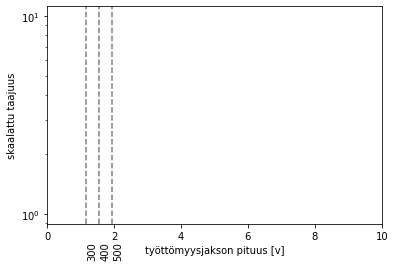

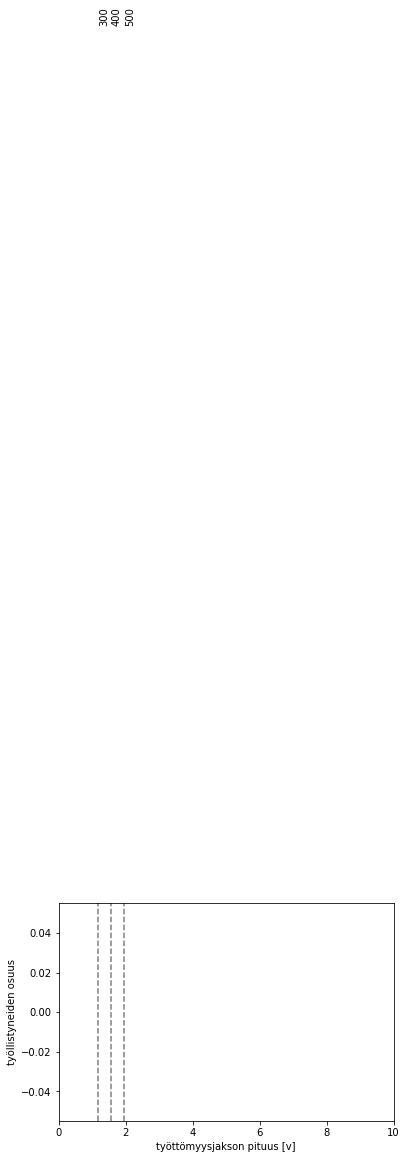

In [3]:
cc2=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc2.render_distrib(stats_results=perusresults)

# Työssäoloehdon lyhentäminen

Poistetaan työssäoloehto

In [4]:
cc1_putki=Lifecycle(env='unemployment-v2',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
poistomalli='best/putki/malli_putki'
cc1_putki.run_distrib(n=100,startn=76,debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=poistomalli,plot=True,cont=True,start_from=perusmalli,results='results/putki/distrib_poisto',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)
cc2.render_distrib(load='results/putki/distrib_poisto_v',n=2,startn=0,stats_results='results/putki/distrib_poisto_stats')

plotdebug False
No mortality included
False
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

computing 76
train...
phase 1


KeyboardInterrupt: 

plotdebug False
No mortality included
False
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

Vaikutus mediaanityöllisyyteen 4368 htv (2100232 vs 2095864)
Vaikutus keskiarvotyöllisyyteen 4931 htv (2100274 vs 2095342)


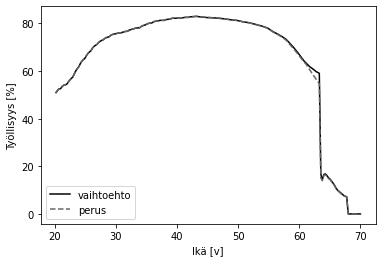

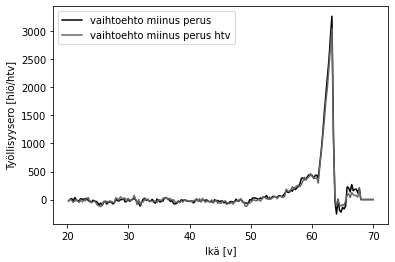

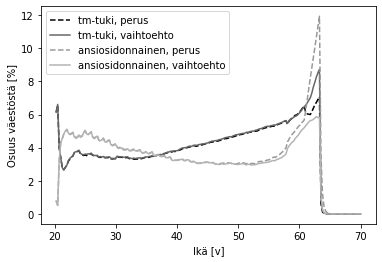

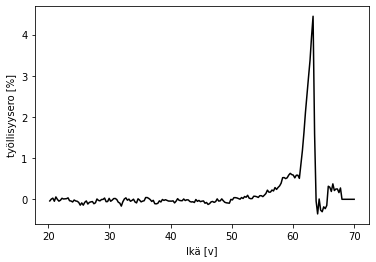

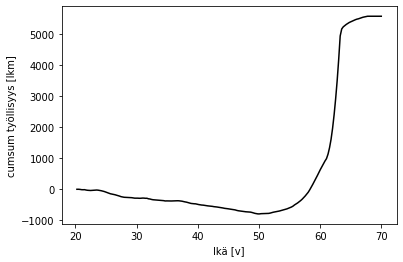

Kumulatiivinen työllisyysvaikutus 50.00 vuotiaana -797.9 htv (1416703 vs 1417501)
Kumulatiivinen työllisyysvaikutus 63.50 vuotiaana 4931.4 htv (2100274 vs 2095342)
Kumulatiivinen työllisyysvaikutus 63.25 vuotiaana 4165.6 htv (2090274 vs 2086108)
Kumulatiivinen työllisyysvaikutus 63.00 vuotiaana 3485.4 htv (2080210 vs 2076725)
Keskikestot käytettyjen ansiosidonnaisten päivärahojen mukaan
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.00 |      0.00 |       0.00 |      0.00 |        0.00 |
| 30-39 |     0.00 |      0.00 |       0.00 |      0.00 |        0.00 |
| 40-49 |     0.00 |      0.00 |       0.00 |      0.00 |        0.00 |
| 50-59 |     0.00 |      0.00 |       0.00 |      0.00 |        0.00 |
| 60-65 |     0.00 |      0.00 |       0.00 |      0.00 |        0.00 |
+-------+----------+-----------+--

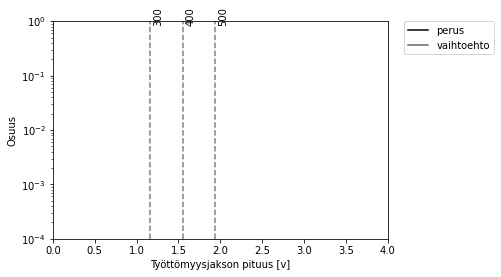

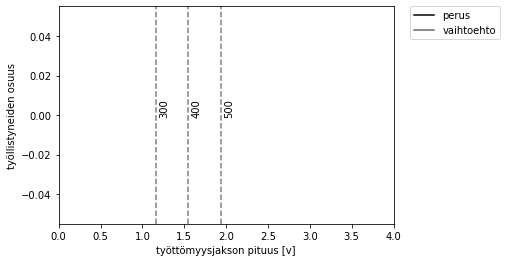

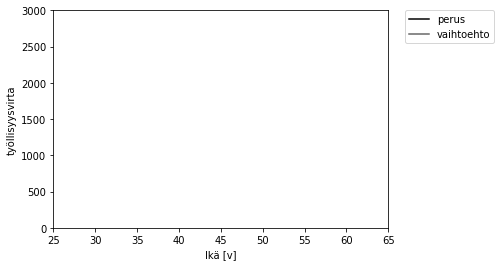

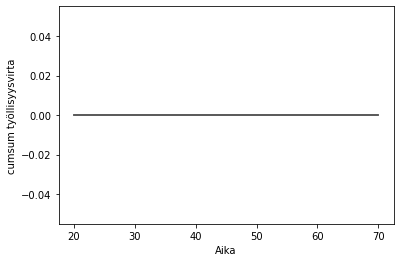

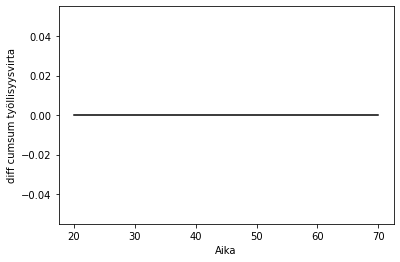

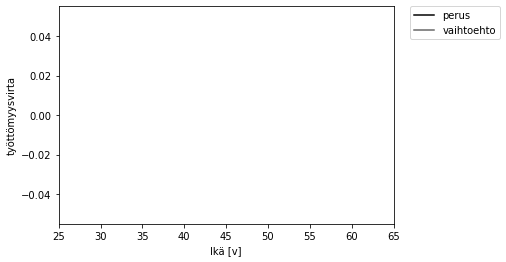

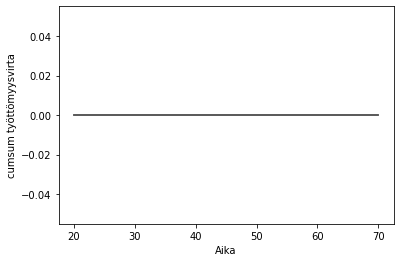

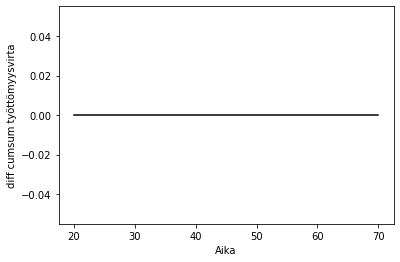

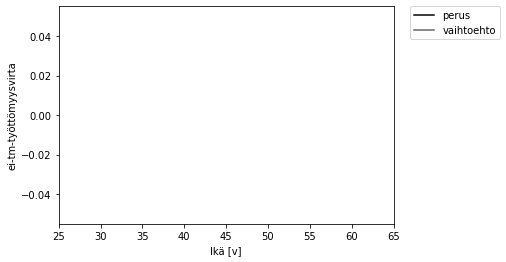

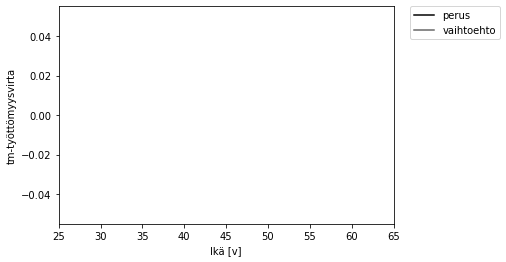

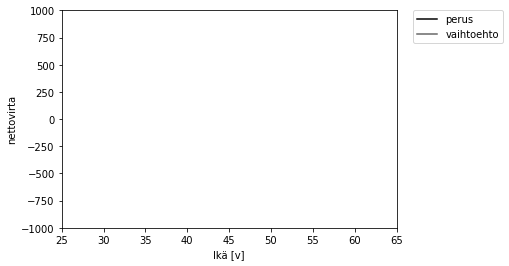

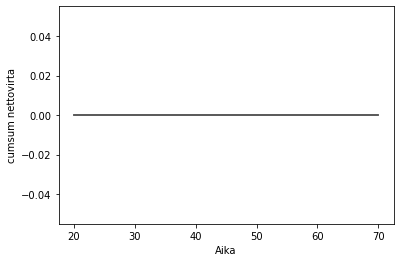

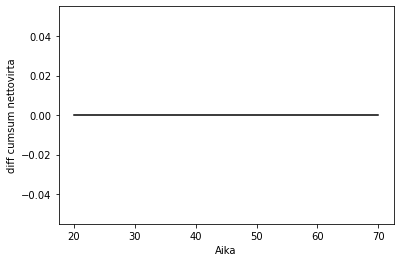

In [6]:
cc1_putki_b=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
#cc1_putki_b.render_distrib(load='results/putki/distrib_poisto_v')
cc1_putki_b.compare_distrib('results/baseline/distrib_stats','results/putki/distrib_poisto_stats')                    


# TOE 12 kk

In [ ]:
cc2_toe=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_toe=1.0,mortality=mortality,perustulo=False,randomness=randomness)
toemalli='best/toe12/malli_toe'
toeresults='best/toe12/malli_toe'
cc2_toe.run_distrib(n=50,startn=18,debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=10,batch2=batch2,
                save=toemalli,plot=True,cont=True,start_from=perusmalli,results='results/toe12/distrib_toe12',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

In [ ]:
cc2_toe=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,perustulo=False,randomness=randomness)
cc2_toe.render_distrib(load='results/toe12/distrib_toe12_v',n=18,startn=0,stats_results='results/toe12/distrib_toe12_stats')
cc2_toe.compare_distrib('results/baseline/distrib_stats','results/toe12/distrib_toe12_stats')